## Token 193 Rotation Experiment

Token 193 is dramatically dissimilar across 10K images. Is this a fixed architectural property, or does it depend on image content? If the outlier position is invariant to geometric transformation, rotating an image should not change which position is the outlier.

In [1]:
from vlm_tools import load_model_and_processor, rotation_experiment

model, processor = load_model_and_processor()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


### Results

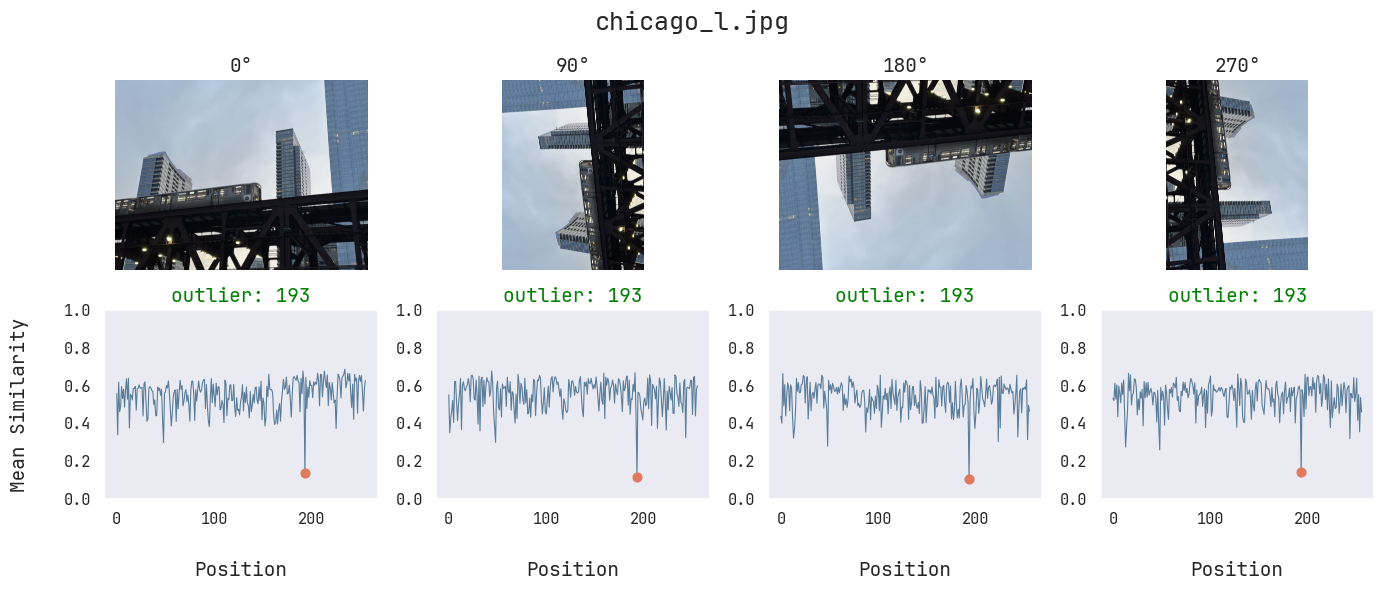

| Rotation | Outlier | Z-Score |
|----------|---------|---------|
|        0 |     193 |  5.20 σ |
|       90 |     193 |  5.36 σ |
|      180 |     193 |  5.44 σ |
|      270 |     193 |  5.19 σ |


[193, 193, 193, 193]

In [2]:
rotation_experiment("images/chicago_l.jpg", model, processor)

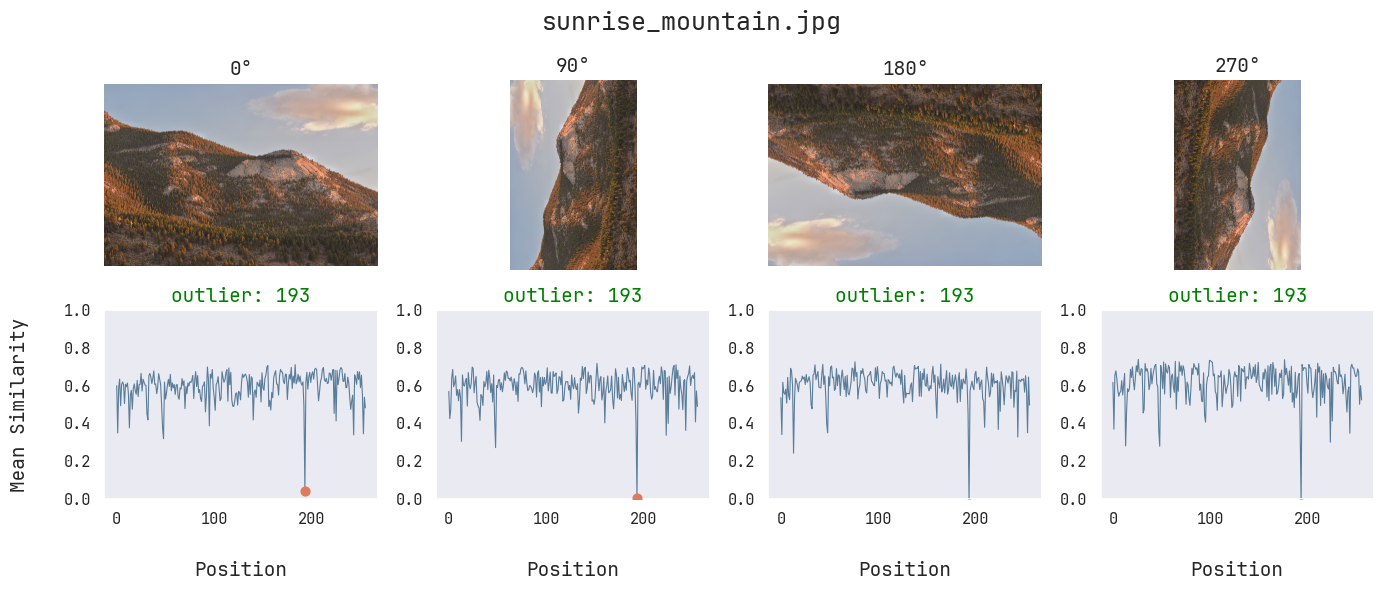

| Rotation | Outlier | Z-Score |
|----------|---------|---------|
|        0 |     193 |  6.89 σ |
|       90 |     193 |  7.14 σ |
|      180 |     193 |  7.69 σ |
|      270 |     193 |  6.78 σ |


[193, 193, 193, 193]

In [3]:
rotation_experiment("images/sunrise_mountain.jpg", model, processor)

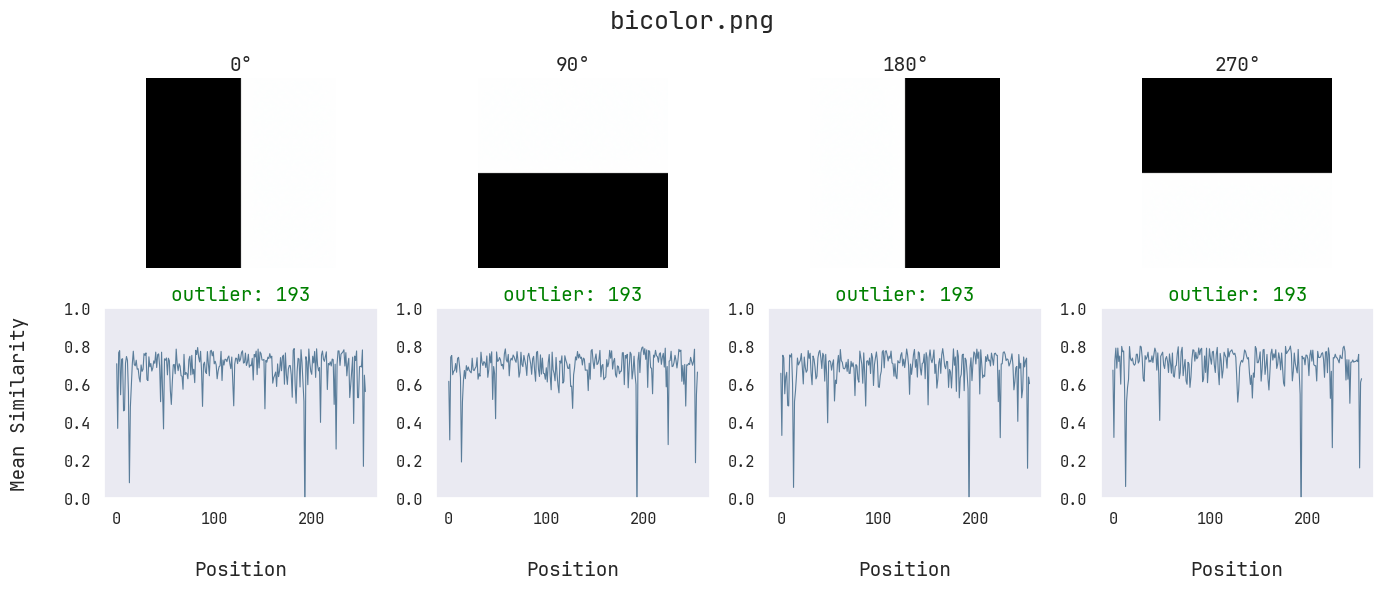

| Rotation | Outlier | Z-Score |
|----------|---------|---------|
|        0 |     193 |  7.30 σ |
|       90 |     193 |  8.23 σ |
|      180 |     193 |  7.69 σ |
|      270 |     193 |  8.16 σ |


[193, 193, 193, 193]

In [4]:
rotation_experiment("images/bicolor.png", model, processor)

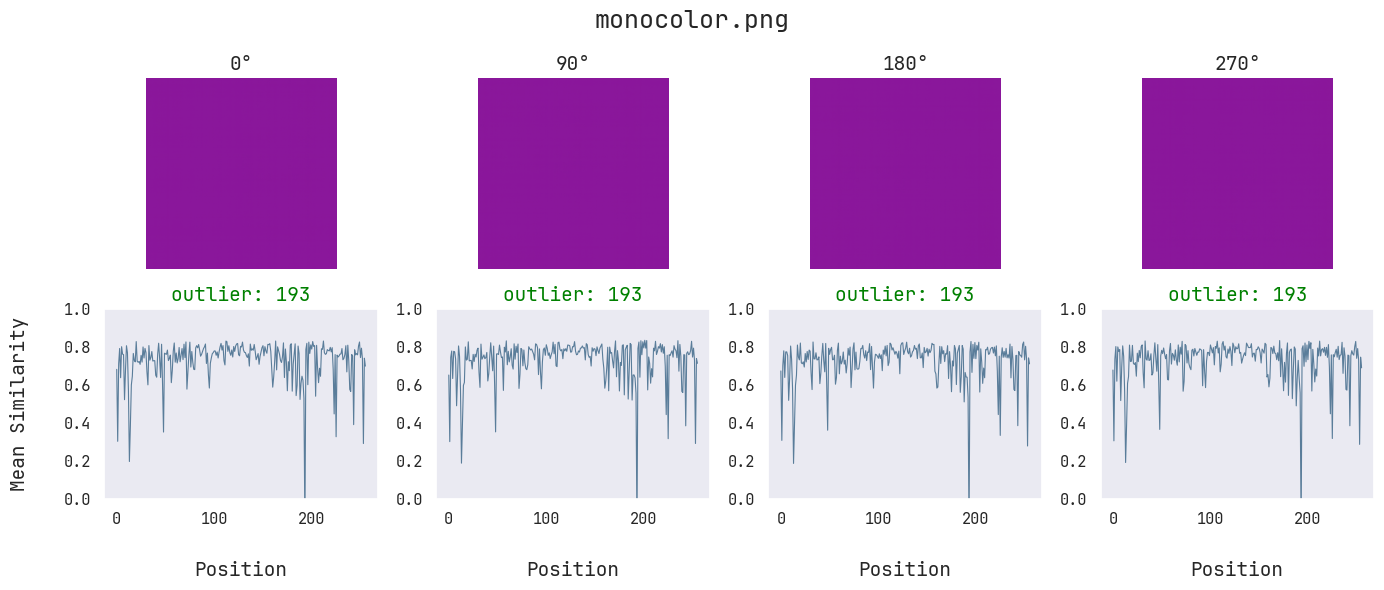

| Rotation | Outlier | Z-Score |
|----------|---------|---------|
|        0 |     193 |  7.85 σ |
|       90 |     193 |  7.77 σ |
|      180 |     193 |  7.89 σ |
|      270 |     193 |  7.83 σ |


[193, 193, 193, 193]

In [5]:
rotation_experiment("images/monocolor.png", model, processor)

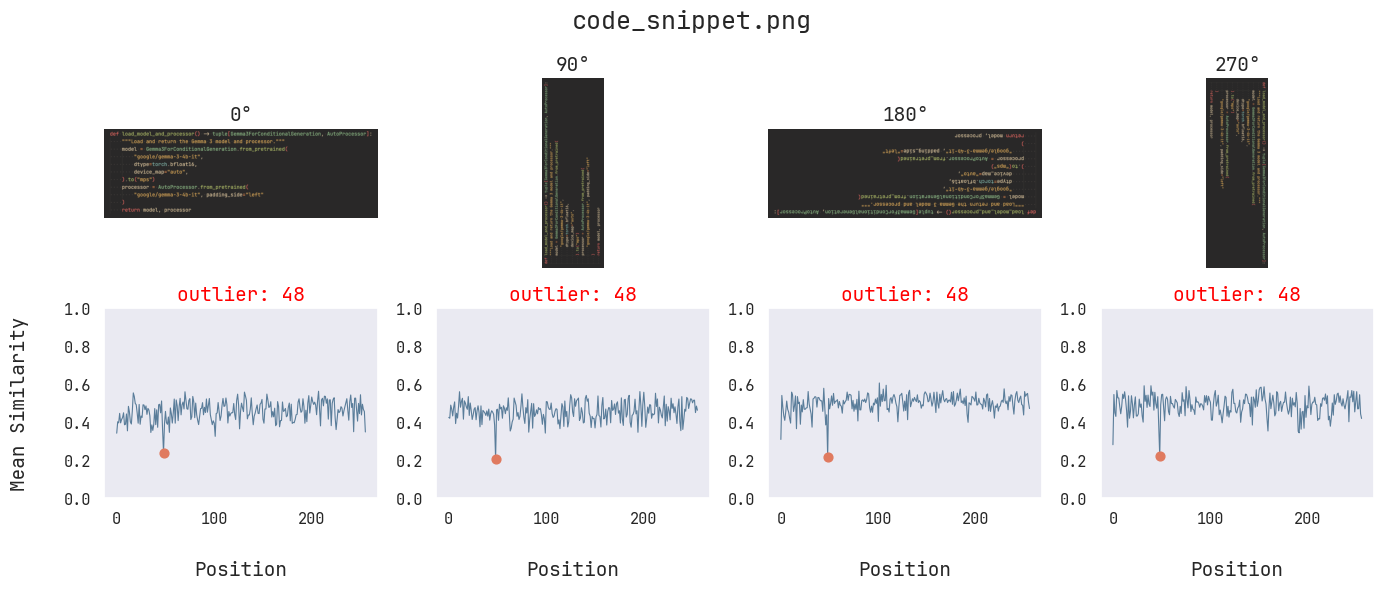

| Rotation | Outlier | Z-Score |
|----------|---------|---------|
|        0 |      48 |  4.17 σ |
|       90 |      48 |  5.03 σ |
|      180 |      48 |  6.23 σ |
|      270 |      48 |  4.97 σ |


[48, 48, 48, 48]

In [6]:
rotation_experiment("images/code_snippet.png", model, processor)

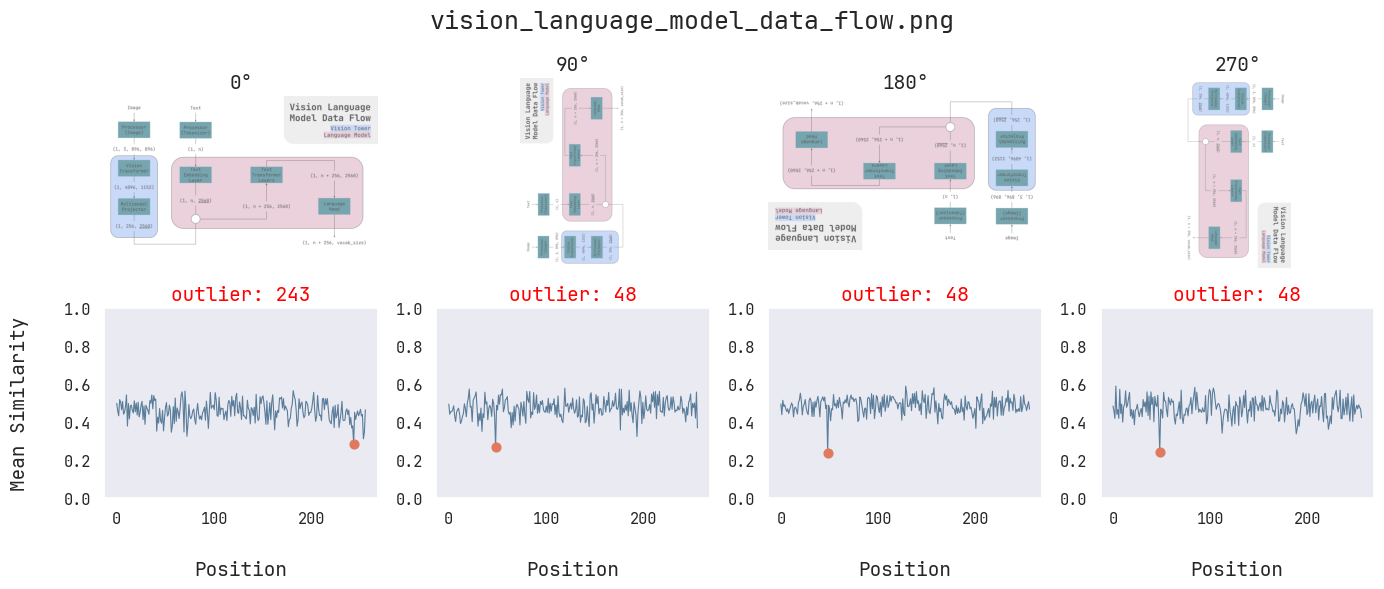

| Rotation | Outlier | Z-Score |
|----------|---------|---------|
|        0 |     243 |  3.43 σ |
|       90 |      48 |  4.10 σ |
|      180 |      48 |  5.80 σ |
|      270 |      48 |  4.45 σ |


[243, 48, 48, 48]

In [7]:
rotation_experiment("images/vision_language_model_data_flow.png", model, processor)

## Conclusion

The outlier position appears to be largely rotation-invariant.

Interestingly, with this small sample of images, we see that not every image has 193 as the outlier. The code snippet and diagram images prove this. Though it does appear that each image has exactly one outlier position. The outliers seen in the code snippet and diagram images (48 and 243) show up in the chart in `1_finding_outlier_positions.ipynb` 2nd and 3rd in their average dissimilarity from other positions.

These results seem to show that the outlier position is quite stable under image rotation, but the outlier position might be content dependent. This 6 image sample is not enough to be conclusive, but the difference between photographic images (which favor 193) and text/diagram images (which favor 48 or 243) is notable.